In [1]:
print("hello world!")

hello world!


In [3]:
# Import libraries (we will use these for whole project)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries loaded successfully!")


Libraries loaded successfully!


In [5]:
# Load the sales data
df = pd.read_csv('retail_sales_dataset.csv')  # ← Your exact filename

# First look at data
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nColumn names:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)


Dataset shape: (1000, 9)

First 5 rows:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  

Column names:
['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']

Data types:
Transaction ID       int64
Date                object
Customer ID         object
Gender     

In [6]:
# Basic data overview
print("Dataset info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())
print("\nDataset description:")
print(df.describe())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None

Missing values:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Dataset description:
       Transaction ID         Age     Quantity  Price per Unit  Total

In [7]:
# Convert Date column to proper datetime
df['Date'] = pd.to_datetime(df['Date'])

# Add useful columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df['Day_of_Week'] = df['Date'].dt.day_name()

print("New columns added!")
print(df[['Date', 'Year', 'Month', 'Day_of_Week']].head())
print("\nDate range:", df['Date'].min(), "to", df['Date'].max())


New columns added!
        Date  Year     Month Day_of_Week
0 2023-11-24  2023  November      Friday
1 2023-02-27  2023  February      Monday
2 2023-01-13  2023   January      Friday
3 2023-05-21  2023       May      Sunday
4 2023-05-06  2023       May    Saturday

Date range: 2023-01-01 00:00:00 to 2024-01-01 00:00:00


Total Sales by Category:
Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


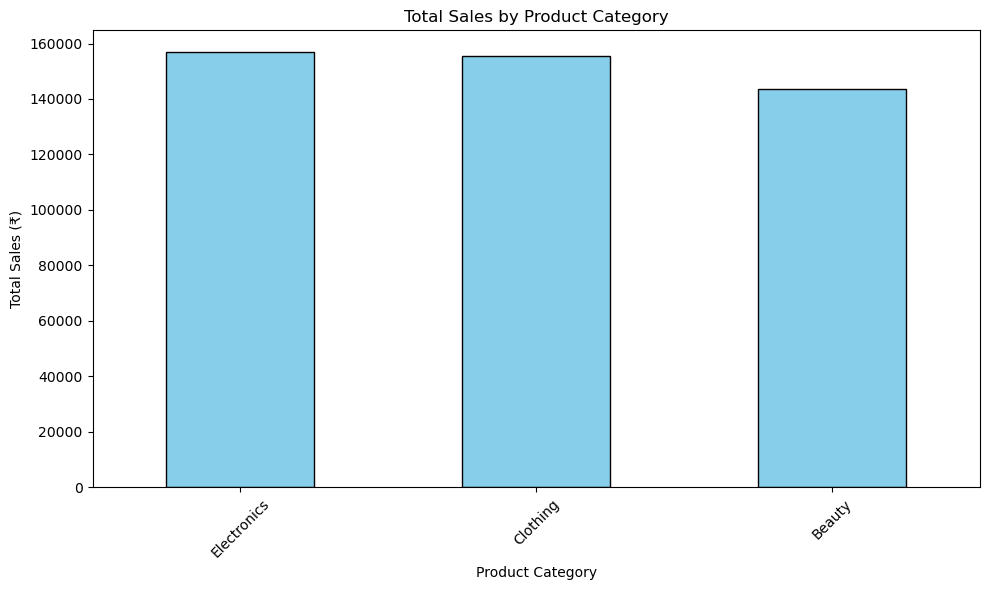

In [9]:
# Total sales by Product Category
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print("Total Sales by Category:")
print(category_sales)

# Bar chart
plt.figure(figsize=(10,6))
category_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Sales by Product Category')
plt.ylabel('Total Sales (₹)')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Monthly Sales:
Month
January      36980
February     44060
March        28990
April        33870
May          53150
June         36715
July         35465
August       36960
September    23620
October      46580
November     34920
December     44690
Name: Total Amount, dtype: int64


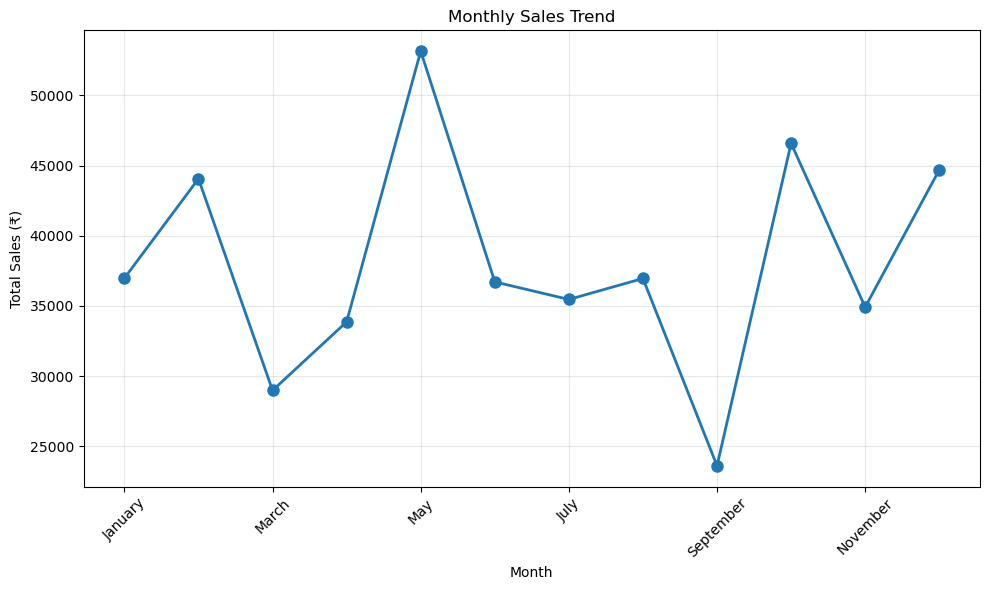

In [10]:
# Sales trend by month
monthly_sales = df.groupby('Month')['Total Amount'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
print("Monthly Sales:")
print(monthly_sales)

# Line chart
plt.figure(figsize=(10,6))
monthly_sales.plot(kind='line', marker='o', linewidth=2, markersize=8)
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales (₹)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Sales by Gender:
Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64


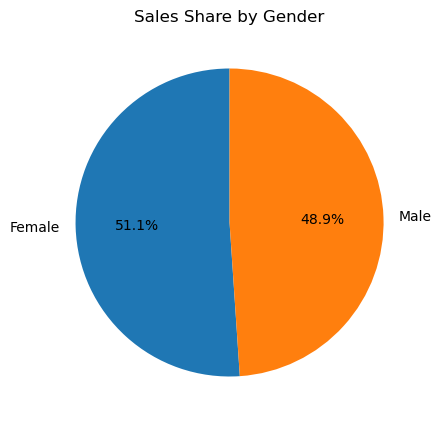

In [11]:
# Sales by Gender
gender_sales = df.groupby('Gender')['Total Amount'].sum()
print("Sales by Gender:")
print(gender_sales)

plt.figure(figsize=(8,5))
gender_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sales Share by Gender')
plt.ylabel('')
plt.show()


Sales by Day of Week:
Day_of_Week
Monday       70250
Tuesday      69440
Wednesday    58770
Thursday     53835
Friday       66290
Saturday     78815
Sunday       58600
Name: Total Amount, dtype: int64


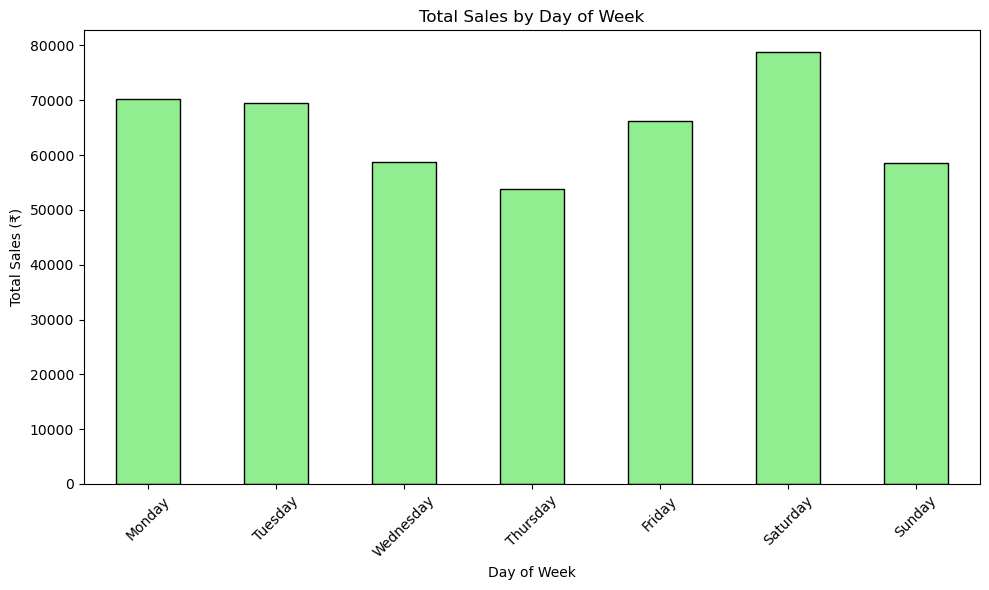

In [12]:
# Best performing day of week
dow_sales = df.groupby('Day_of_Week')['Total Amount'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
print("Sales by Day of Week:")
print(dow_sales)

plt.figure(figsize=(10,6))
dow_sales.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Total Sales by Day of Week')
plt.ylabel('Total Sales (₹)')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 10 Customers:
Customer ID
CUST487    2000
CUST476    2000
CUST773    2000
CUST503    2000
CUST093    2000
CUST089    2000
CUST946    2000
CUST157    2000
CUST155    2000
CUST420    2000
Name: Total Amount, dtype: int64


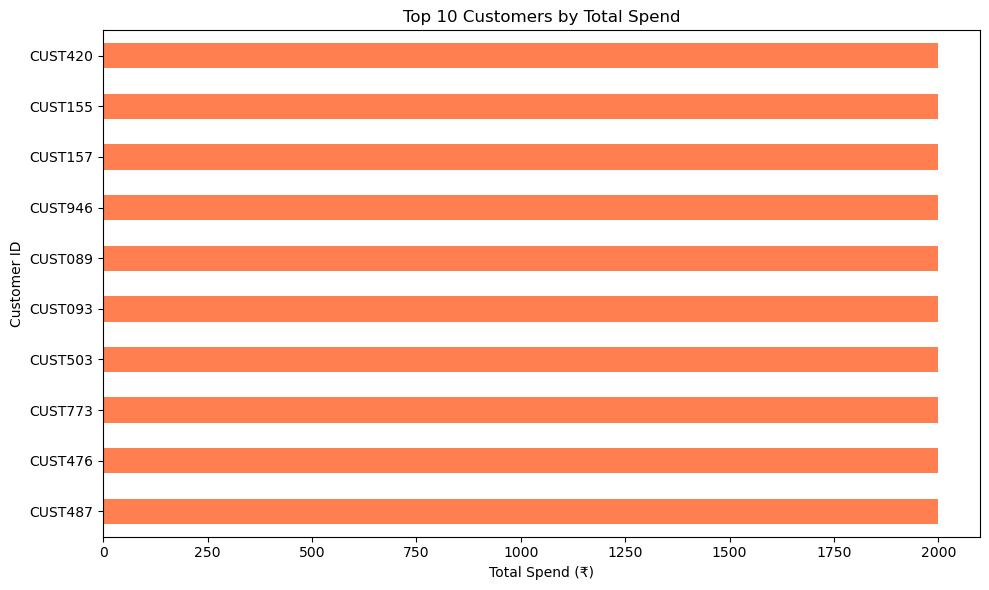

In [13]:
# Top 10 customers by total spend
top_customers = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10)
print("Top 10 Customers:")
print(top_customers)

plt.figure(figsize=(10,6))
top_customers.plot(kind='barh', color='coral')
plt.title('Top 10 Customers by Total Spend')
plt.xlabel('Total Spend (₹)')
plt.tight_layout()
plt.show()


Avg Spend by Age Group:
Age_Group
18-25    500.295858
26-35    480.390244
36-45    454.801980
46-55    439.694323
56+      412.358974
Name: Total Amount, dtype: float64


C:\Users\rajmo\AppData\Local\Temp\ipykernel_26436\1671553015.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spend = df.groupby('Age_Group')['Total Amount'].mean()


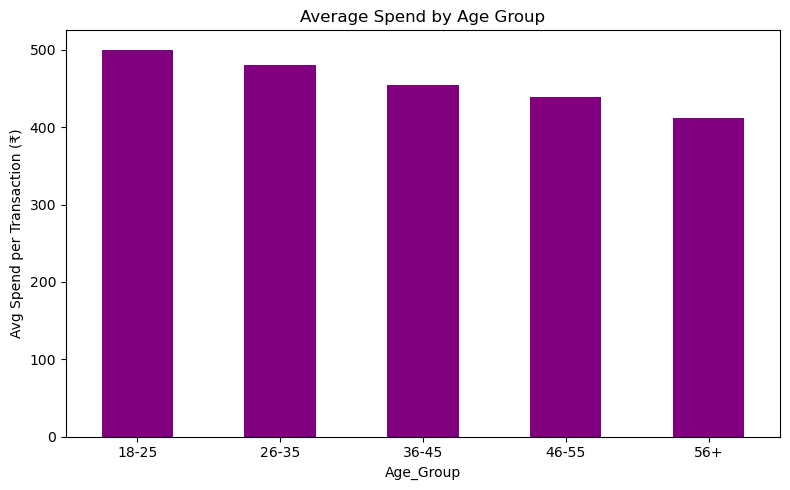

In [14]:
# Average spend by age group
df['Age_Group'] = pd.cut(df['Age'], bins=[0,25,35,45,55,65], labels=['18-25','26-35','36-45','46-55','56+'])
age_spend = df.groupby('Age_Group')['Total Amount'].mean()
print("Avg Spend by Age Group:")
print(age_spend)

plt.figure(figsize=(8,5))
age_spend.plot(kind='bar', color='purple')
plt.title('Average Spend by Age Group')
plt.ylabel('Avg Spend per Transaction (₹)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [15]:
# Quick project summary
print("=== RETAIL SALES PROJECT STATUS ===")
print(f"Dataset: {df.shape[0]} transactions, {df.shape[1]} columns")
print(f"Total Revenue: ₹{df['Total Amount'].sum():,.0f}")
print(f"Avg Transaction: ₹{df['Total Amount'].mean():.0f}")
print(f"Date Range: {df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}")
print("Top Category:", df.groupby('Product Category')['Total Amount'].sum().idxmax())
print("✅ Project ready for GitHub!")


=== RETAIL SALES PROJECT STATUS ===
Dataset: 1000 transactions, 13 columns
Total Revenue: ₹456,000
Avg Transaction: ₹456
Date Range: 2023-01-01 to 2024-01-01
Top Category: Electronics
✅ Project ready for GitHub!
